In [8]:
import zipfile

with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()  # Extracts to current directory or specify a path inside ()


In [9]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('heart.csv')

# Show the first 5 rows of the dataset to verify it loaded correctly
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# Separate features (X) and target (y)
X = data.drop(columns=['target'])  # Replace 'target' with the actual target column name if different
y = data['target']


In [11]:
from sklearn.model_selection import train_test_split

# Split data - 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [13]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



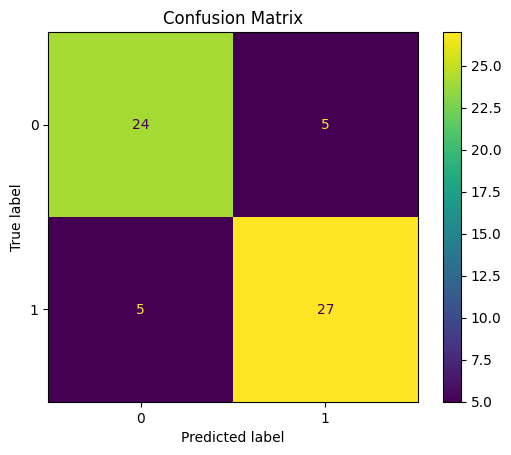

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [16]:
import joblib

# Save the model to a file
joblib.dump(model, 'disease_prediction_model.joblib')

print("Model saved successfully!")

Model saved successfully!


In [17]:
loaded_model = joblib.load('disease_prediction_model.joblib')

     Feature  Importance
9    oldpeak    0.128485
7    thalach    0.119725
11        ca    0.115533
2         cp    0.103792
12      thal    0.093300
0        age    0.092811
3   trestbps    0.077537
8      exang    0.075809
4       chol    0.074812
10     slope    0.051058
1        sex    0.035658
6    restecg    0.019782
5        fbs    0.011698


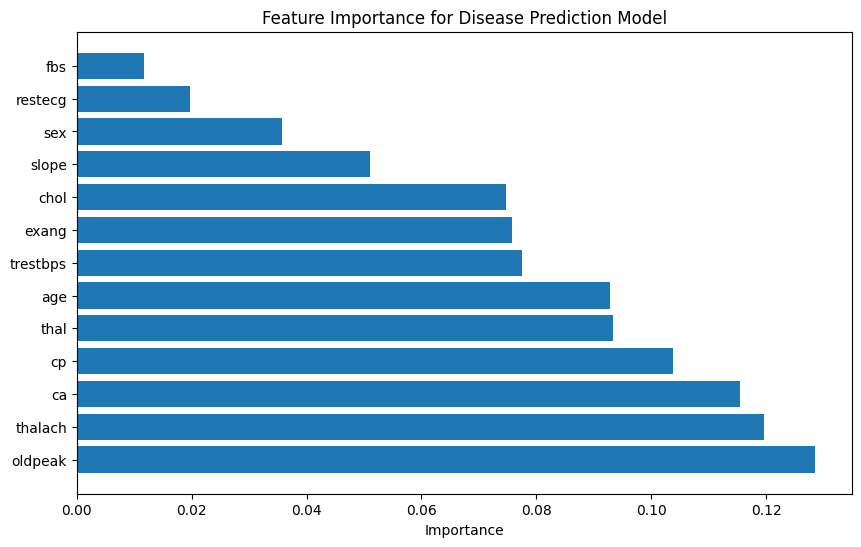

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance for Disease Prediction Model')
plt.show()

In [19]:
# Example new data point - should have the same columns as X
new_data = pd.DataFrame({
    'age': [63],
    'sex': [1],
    'cp': [3],
    'trestbps': [145],
    'chol': [233],
    'fbs': [1],
    'restecg': [0],
    'thalach': [150],
    'exang': [0],
    'oldpeak': [2.3],
    'slope': [0],
    'ca': [0],
    'thal': [1]
})

# Predict disease (0 = no disease, 1 = disease)
prediction = model.predict(new_data)
print("Prediction (0 = no disease, 1 = disease):", prediction[0])


Prediction (0 = no disease, 1 = disease): 1


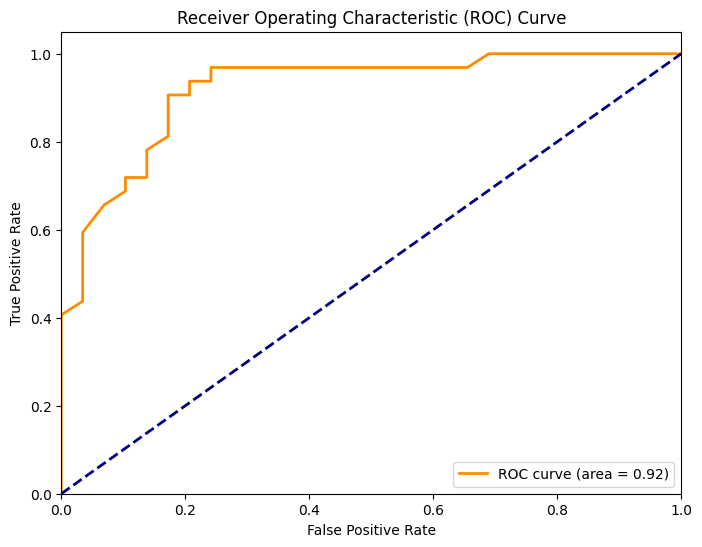

In [20]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for positive class
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [21]:
import pandas as pd

# Assuming y_test and y_pred already exist
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Export to CSV file
results.to_csv('disease_prediction_results.csv', index=False)

print("Predictions exported to 'disease_prediction_results.csv'")


Predictions exported to 'disease_prediction_results.csv'


In [22]:
plt.savefig('figure_name.png')


<Figure size 640x480 with 0 Axes>